![head.png](https://github.com/cafawo/FinancialDataAnalytics/blob/master/figures/head.jpg?raw=1)

# Financial Data Analytics in Python

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
MLU - Martin Luther University Halle-Wittenberg

fabian.woebbeking@iwh-halle.de

# Homework: Value at Risk

You will need a Git/GitHub repository to submit your course deliverables. Consult [**slides.ipynb**](https://github.com/iwh-halle/FinancialDataAnalytics) for help with the tasks below! If you need further assistance, do not hesitate to open a Q&A at https://github.com/iwh-halle/FinancialDataAnalytics/discussions

In this assignment you will work with data that is stored in a file named **02_python_data.csv**, which contains daily stock prices for various companies listed on Deutsche Börse (Xetra). The columns are labeled with Reuters identifier code (RIC). The first RIC '.GDAXI' is the german DAX index, the remaining RICs represent its constituents.

### Task: 

Load the data and show in a single plot the cumulative log-returns of '.GDAXI' as well as an equally weighted portfolio of its constituents (all the other assets in 02_python_data.csv, excluding '.GDAXI').

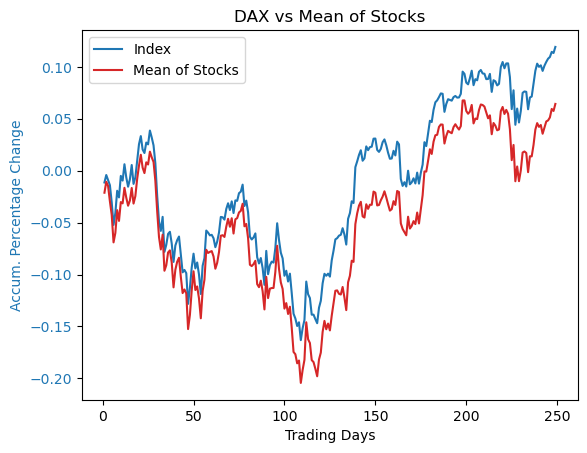

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

prices =  pd.read_csv("02_python_data.csv")

gdaxi = pd.DataFrame({".GDAXI" : prices[".GDAXI"]})
prices = prices.drop(columns={"Date", ".GDAXI"}, axis = 1)

log_stocks = np.log(prices / prices.shift(1))
log_stocks = log_stocks.dropna()

stocks_cumulative = pd.DataFrame()
for column in log_stocks.columns:
    stocks_cumulative[column] = log_stocks[column].cumsum()

historical_returns = (stocks_cumulative * (1/39)).sum(axis =1)

log_gdaxi = np.log(gdaxi / gdaxi.shift(1))
log_gdaxi = log_gdaxi.dropna()

gdaxi_cumulative = pd.DataFrame({'.GDAXI': log_gdaxi['.GDAXI'].cumsum()})


#3
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Trading Days')
ax1.set_ylabel('Accum. Percentage Change', color=color)
ax1.plot(gdaxi_cumulative[".GDAXI"], color=color, label='Index')  # Setting label for gdaxi_frame plot
ax1.tick_params(axis='y', labelcolor=color)

# Plotting the returns on the right y-axis with a label
ax1.plot(historical_returns, color='tab:red', label='Mean of Stocks')  # Setting label for logreturns plot

ax1.legend(loc='upper left')  # Adding legend

plt.title('DAX vs Mean of Stocks')
plt.show()


### Task: 

We now want to compare the risk of **both** portfolios from the previous task ('.GDAXI and the equally weighted portfolio'). To do so, calculate the 95% 1-day [Value at Risk (VaR)](https://en.wikipedia.org/wiki/Value_at_risk), using:

* Historical simulation,
* the Parametric method,
* Monte Carlo simulation.

Add all values to a data frame and `display()`

In [60]:
confidence_interval = 0.99

VaR = -np.percentile(log_gdaxi, 100 - (confidence_interval * 100))
print(f"The VaR is around {VaR:.2f} for the Dax")

VaR = -np.percentile(historical_returns, 100 - (confidence_interval * 100))
print(f"The VaR is around {VaR:.2f} for the portfolio of individual stocks")

Das VaR für den Dax liegt bei 0.03
Das VaR für die Aktien liegt bei 0.19


### Task: 

In order to visualize the VaR results we focus only on '.GDAXI' (you can create `plt.subplots()` for the equally weighted portfolio if you like). In the plot:

1. Plot a histogram of the returns
2. Add a line plot of the normal distribution (parameterized to the returns)
3. Add indicators for the 3 VaRs (vertical lines or annotations)

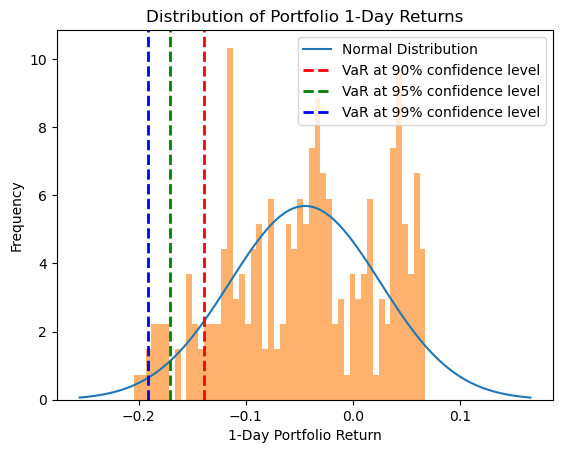

In [61]:
# Calculate the rolling sum of historical returns with the specified window
range_returns = historical_returns.rolling(window=return_window).sum()  # Rolling sum of historical returns
range_returns = range_returns.dropna()  # Drop NaN values

range_returns_dollar = range_returns  # Assigning to a new variable

import scipy.stats as stats

# Calculate VaR for 90%, 95%, and 99% confidence intervals
VaR_90 = -np.percentile(historical_returns, 100 - 90)
VaR_95 = -np.percentile(historical_returns, 100 - 95)
VaR_99 = -np.percentile(historical_returns, 100 - 99)

mu, sigma = np.mean(historical_returns), np.std(historical_returns)

# Create the line plot for the normal distribution
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label='Normal Distribution')

# Create the histogram for portfolio returns
plt.hist(range_returns_dollar.dropna(), bins=50, density=True, alpha=0.6)

# Labeling the x and y axes
plt.xlabel(f'{return_window}-Day Portfolio Return')
plt.ylabel('Frequency')

# Title of the plot
plt.title(f'Distribution of Portfolio {return_window}-Day Returns')

# Adding dashed lines for VaR at 90%, 95%, and 99% confidence levels
plt.axvline(-VaR_90, color='r', linestyle='--', linewidth=2, label='VaR at 90% confidence level')
plt.axvline(-VaR_95, color='g', linestyle='--', linewidth=2, label='VaR at 95% confidence level')
plt.axvline(-VaR_99, color='b', linestyle='--', linewidth=2, label='VaR at 99% confidence level')

# Display legend
plt.legend()

# Show plot
plt.show()